# *Zenith Bank Loan Data Analysis & Recommendations*

In [1]:
# Importing Libraries


import numpy as np # For pre-preocessing data
import pandas as pd # For pre-preocessing data
import matplotlib.pyplot as plt # For visualisation
%matplotlib inline
import seaborn as sns # For visualisation

from sklearn.linear_model import LogisticRegression # For training our Logistic Regression model
import scipy.stats as stats # For training our model using Statsmodels
import statsmodels.api as sm # For training our model using Statsmodels
from sklearn.metrics import classification_report,confusion_matrix # For Performance metrics
from sklearn.metrics import ConfusionMatrixDisplay # For plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate # For cross validation scores
from sklearn.model_selection import cross_val_score # For cross validation scores
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# For Performance metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For Feature Selection
from sklearn.metrics import roc_auc_score # For ROC AUC
from sklearn.metrics import roc_curve # For plotting ROC
from sklearn.metrics import precision_recall_curve # For plotting Precision and Recall

import os # For changing home directory
from sklearn.model_selection import train_test_split # For train test split


pd.set_option('display.max_rows', 250) # to show upto 250 rows in output
pd.set_option('display.max_colwidth',250) # to show upto 250 cols in output
pd.set_option('display.float_format', lambda x: '%.5f' % x) # customised format for pandas dataframe output


import warnings
warnings.filterwarnings('ignore') # To supress warnings


plt.style.use('ggplot') # set the background for the graphs


customers_data = pd.read_csv(r"/content/zenith_bank_customer_loans.csv")

print(f'We have {customers_data.shape[0]} rows and {customers_data.shape[1]} columns in the data') # fstring

customers_data.head()


We have 5000 rows and 14 columns in the data


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [2]:

print ("Rows     : " , customers_data.shape[0])  #shows count of rows
print ("Columns  : " , customers_data.shape[1])  #shows count of cols
print ("="*55,"\n","Features : \n","-"*10,"\n", customers_data.columns.tolist())  # lists down all the features


Rows     :  5000
Columns  :  14
 Features : 
 ---------- 
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [3]:
print ("Missing values :\n\n", customers_data.isnull().sum().sort_values(ascending=False))
# Finding out number of unique values in each column.
print ("\nUnique values :")
customers_data.nunique()

Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Unique values :


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [4]:
# Dropping ID
customers_data.drop(['ID'],axis=1,inplace=True)

customers_data.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan",
"Securities Account":"SecuritiesAccount",
"CD Account": "CDAccount"},inplace=True)

customers_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [5]:
# Checking number of unique zipcodes again
customers_data.ZIPCode.nunique()

# Installing zipcodes library to map Zipcodes to corresponding counties
!pip install zipcodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Making a list of unique Zipcodes, which will be used to map to counties in next step
zipcodes =customers_data.ZIPCode.unique()

zipcodes[0:5]

array([91107, 90089, 94720, 94112, 91330])

In [71]:

# Mapping Zipcodes to Counties
import zipcodes as zcode


zip_dict={}
for zipcode in zipcodes:
  city_county = zcode.matching(zipcode.astype('str'))

# If Zipcode exits, map county
  if len(city_county)==1:
    county=city_county[0].get('county')

# Otherwise assign Zipcode only as County
  else:
    county=zipcode

  zip_dict.update({zipcode:county})

print(zip_dict, end= " ")

{91107: 'Los Angeles County', 90089: 'Los Angeles County', 94720: 'Alameda County', 94112: 'San Francisco County', 91330: 'Los Angeles County', 92121: 'San Diego County', 91711: 'Los Angeles County', 93943: 'Monterey County', 93023: 'Ventura County', 94710: 'Alameda County', 90277: 'Los Angeles County', 93106: 'Santa Barbara County', 94920: 'Marin County', 91741: 'Los Angeles County', 95054: 'Santa Clara County', 95010: 'Santa Cruz County', 94305: 'Santa Clara County', 91604: 'Los Angeles County', 94015: 'San Mateo County', 90095: 'Los Angeles County', 91320: 'Ventura County', 95521: 'Humboldt County', 95064: 'Santa Cruz County', 90064: 'Los Angeles County', 94539: 'Alameda County', 94104: 'San Francisco County', 94117: 'San Francisco County', 94801: 'Contra Costa County', 94035: 'Santa Clara County', 92647: 'Orange County', 95814: 'Sacramento County', 94114: 'San Francisco County', 94115: 'San Francisco County', 92672: 'Orange County', 94122: 'San Francisco County', 90019: 'Los Angele

In [8]:

zip_dict.update({92717:'Orange County'})
zip_dict.update({92634:'Orange County'})

In [9]:
customers_data['County']=customers_data['ZIPCode'].map(zip_dict)
customers_data.County.nunique()
customers_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County


In [10]:
cat_features = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
customers_data[cat_features] = customers_data[cat_features].astype('category')

customers_data[customers_data['Experience']<0]['Age'].describe()
customers_data.loc[customers_data['Experience']<0,'Experience']=np.abs(customers_data['Experience'])


In [11]:
for column in cat_features:
  print(customers_data[column].value_counts())
  print("*" * 55)


0    4520
1     480
Name: PersonalLoan, dtype: int64
*******************************************************
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
*******************************************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*******************************************************
0    4698
1     302
Name: CDAccount, dtype: int64
*******************************************************
1    2984
0    2016
Name: Online, dtype: int64
*******************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
*******************************************************
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
*******************************************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************

In [12]:

def univariate(data_univariate):

  Name=data_univariate.name
  fig,(ax_boxplot,ax_distplot)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(10, 5))


  sns.set_theme(style="white")                                           # set background as white for clean plot
  fig.suptitle("Univariate Plots : "+ Name  , fontsize=15, fontweight='bold')
  sns.boxplot(x=data_univariate,showmeans=True, orient='h',color="violet",ax=ax_boxplot)  # Plot boxplot
  ax_boxplot.set(xlabel='')
  sns.despine(top=True,right=True,left=True)                                      # this removes side borders
  sns.distplot(data_univariate,kde=False,color='blue',ax=ax_distplot)            # plot distplot

  mean=data_univariate.mean()
  median=data_univariate.median()
  mode=data_univariate.mode().tolist()[0]
  ax_distplot.axvline(mean, color='r', linestyle='--',linewidth=2)              # plot mean line
  ax_distplot.axvline(median, color='g', linestyle='-',linewidth=2)               # plot median line
  ax_distplot.axvline(mode, color='y', linestyle='-',linewidth=2)               # plot mode line
  plt.legend({'Mean':mean,'Median':median,'Mode':mode})


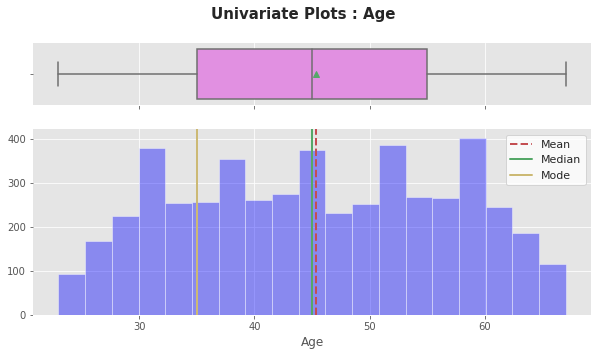

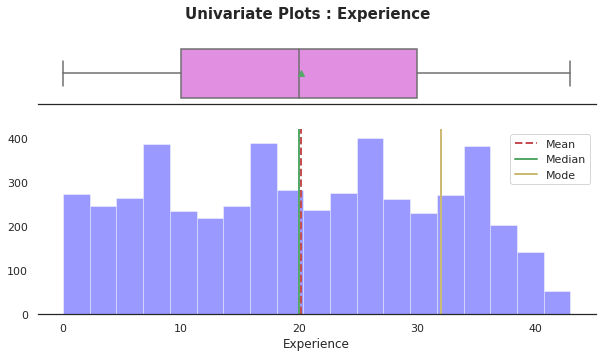

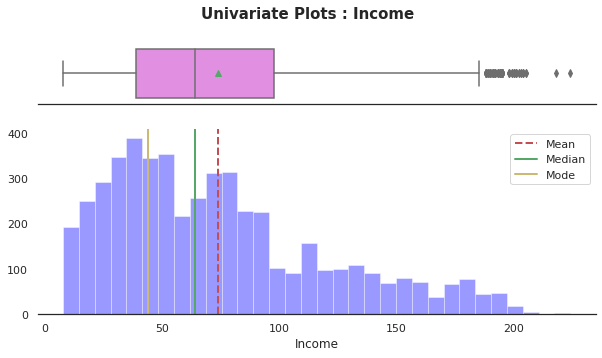

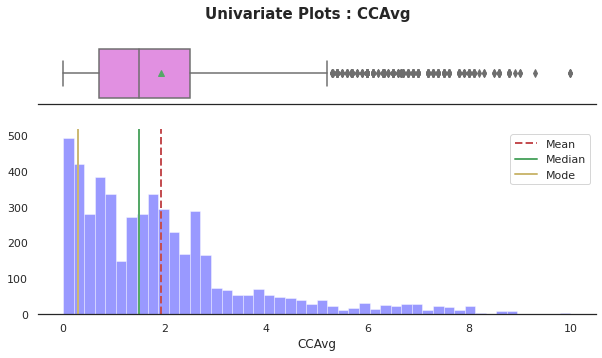

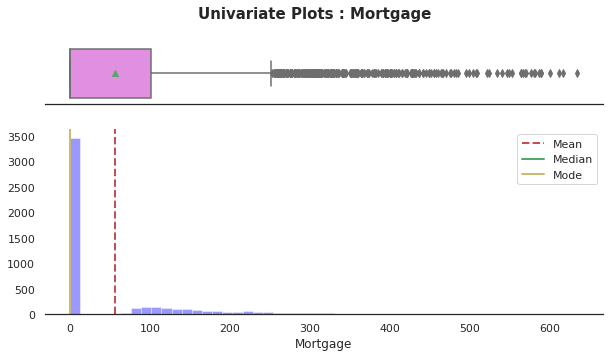

In [13]:
  num_f =  ['Age','Experience','Income','CCAvg','Mortgage']
  for i in range(len(num_f)):
    univariate(customers_data[num_f[i]])


In [14]:
original_data = pd.read_csv(r"/content/zenith_bank_customer_loans.csv")

In [15]:

#EDA | Univariate Analysis - Categorical Variables
customers_data['Age_bins'] = pd.cut(customers_data['Age'], bins = [0, 30, 40, 50, 60, 100],
labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

In [16]:
# Create a new variable - Income group

customers_data["Income_segment"] = pd.cut(
x=original_data["Income"],
bins=[0, 50, 140, 224],
labels=["Lower", "Middle", "High"],
)

In [17]:
customers_data.CCAvg.describe()
customers_data["Spending_segment"] = pd.cut( x=customers_data["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
labels=["Low", "Medium", "High"],include_lowest=True )

In [18]:
customers_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Age_bins,Income_segment,Spending_segment
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium


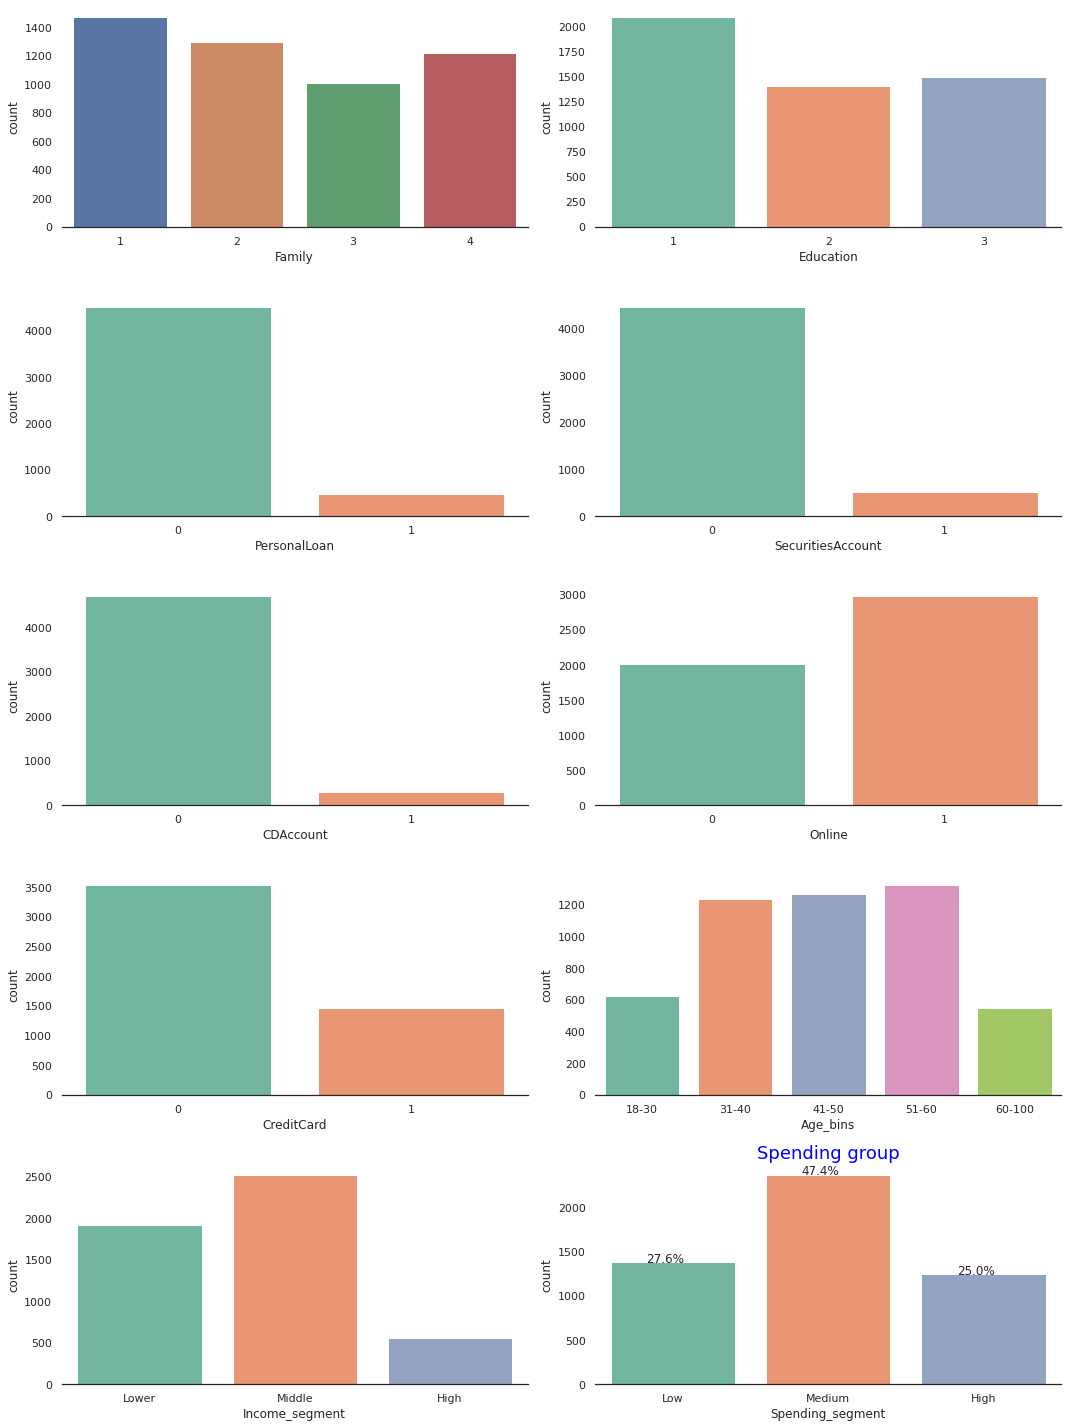

In [19]:

cat_cols = ['Family','Education','PersonalLoan','SecuritiesAccount',
'CDAccount','Online','CreditCard',
'Age_bins','Income_segment','Spending_segment'] # list of all categorical features
titles=['Family Members Coun','Education Profile','Customers with/without Previous Loan',
'Customers with/without Security Account','Customers with/without CD Account',
'Customers with/without Online banking',' Customers with/without Credit Card',
'Age bins',"Income group",'Spending group'] # List of plot titles for better understanding of plot
plt.figure(figsize=(15,20))

sns.set_theme(style="white") # white background

for i, variable in enumerate(cat_cols):
  plt.subplot(5,2,i+1) # Adjusting logic for subplots

  ax=sns.countplot(x=customers_data[variable], data=customers_data ) # plot countplot
  sns.set_palette('Set2') # setting theme
  sns.despine(top=True,right=True,left=True) # remove unnecessary boundaries
for p in ax.patches: # using matplotlib axes object to show %s
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(customers_data[variable]))
  x = p.get_x() + p.get_width() / 2 - 0.05
  y = p.get_y() + p.get_height()
  plt.annotate(percentage, (x, y),ha='center')
  plt.tight_layout()
  plt.title(titles[i],size = 18, color = 'blue')

Insights

Almost 1/3rd customers are single.

~40% customers are undergraduates.

Just ~10% have a previous loan with the bank

~10% customers have a securities account

A mere 5% customer have a CD account.

More customers transact online (60%).

Almost 1/3rd customers have credit cards.

3/4th of customers are in range of 31- 60.

Half of the customers belong to middle income group.

Half of the customers has medium Average spending

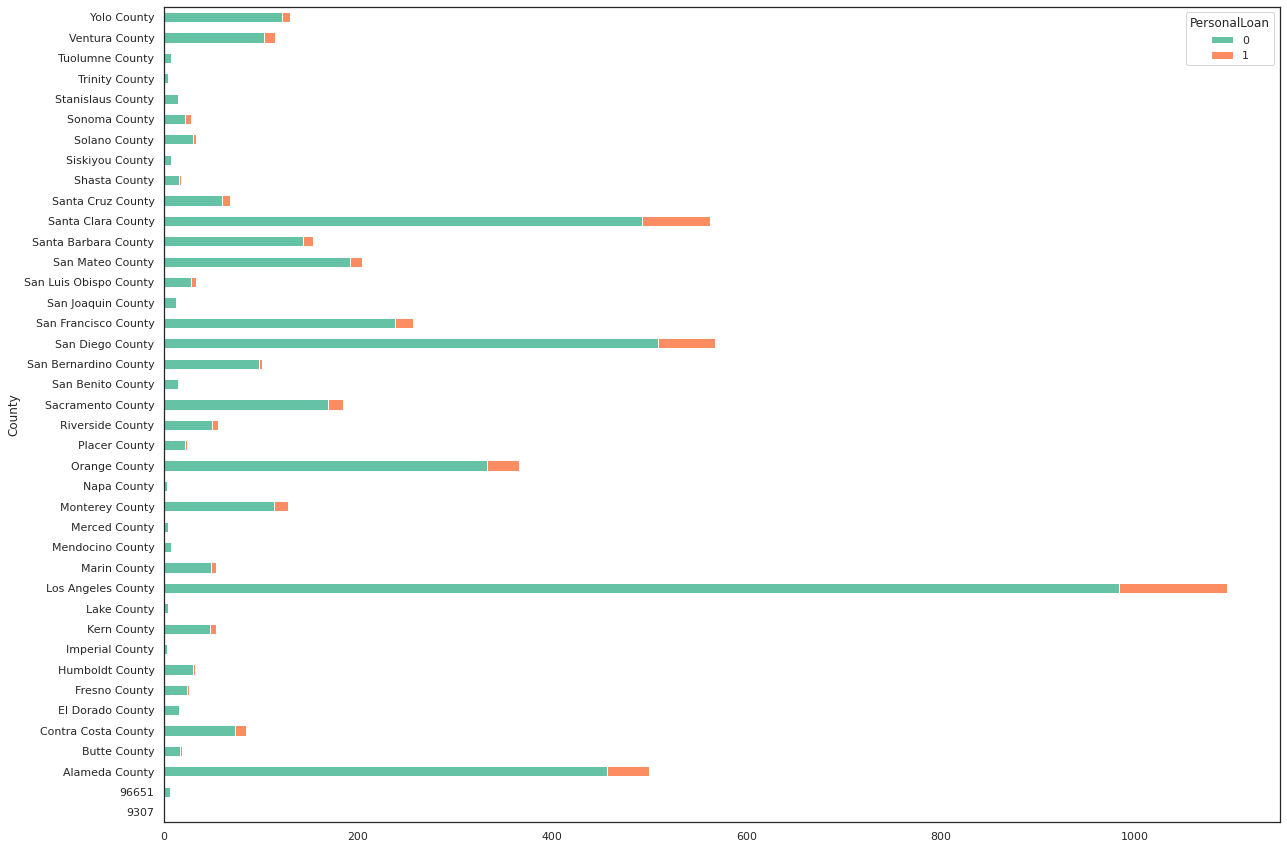

In [20]:

customers_data.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

# Plotting the above data via Crosstab

pd.crosstab(index=customers_data['County'],columns=customers_data['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(20,15))


In [21]:
counties_region_mapping = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}



In [22]:

customers_data['Regions'] = customers_data['County'].map(counties_region_mapping)
customers_data['Regions'].unique()
customers_data.isnull().sum()
customers_data.dropna(inplace=True)


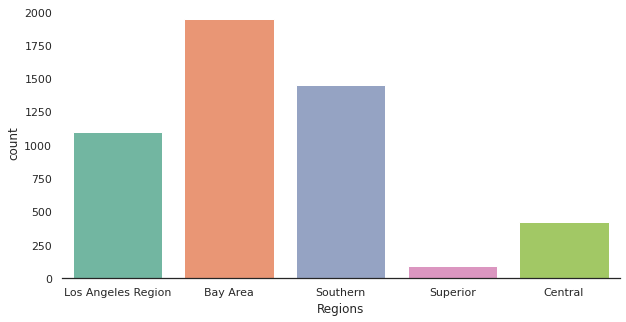

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=customers_data,x=customers_data['Regions'])
sns.despine(top=True,right=True,left=True)

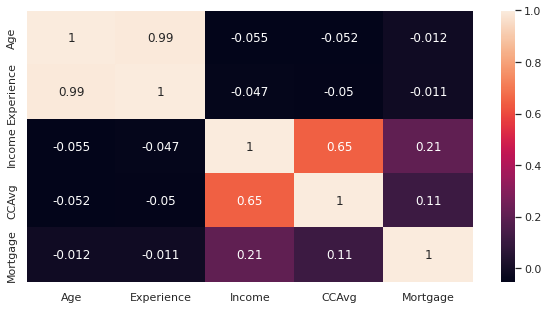

In [24]:

#EDA | Bivariate & Multivariate Analysis

sns.set_palette(sns.color_palette("Set2", 10))
plt.figure(figsize=(10,5))
sns.heatmap(customers_data.corr(),annot=True)
plt.show()


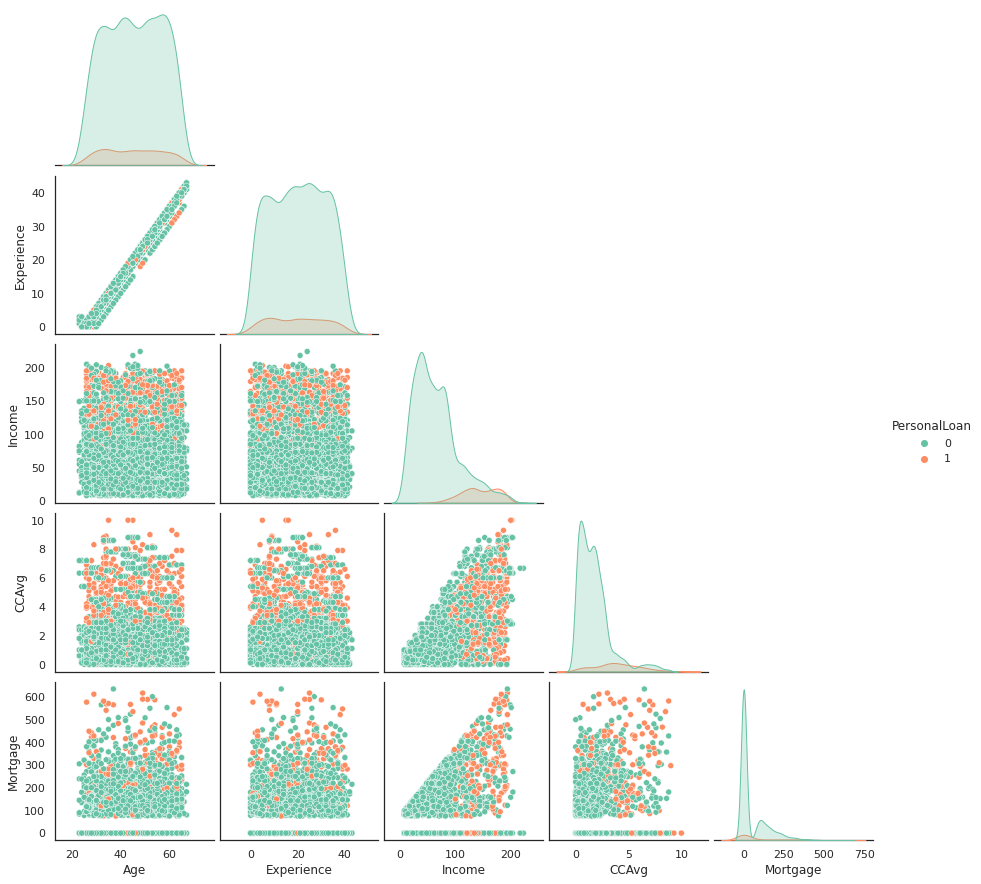

In [25]:

sns.set_palette(sns.color_palette("Set2", 10))
sns.pairplot(customers_data, hue="PersonalLoan",corner=True)
plt.show()

Heatmap & Pairplot Insights-

Age & experience seem to be highly correlated.

Income & Average spending are positively corrleated.

Counter-intiutively, Mortgage has very little correlation with income.

Higher Income & Higher spending seem to be consisting of a lot of potential loan buyers.

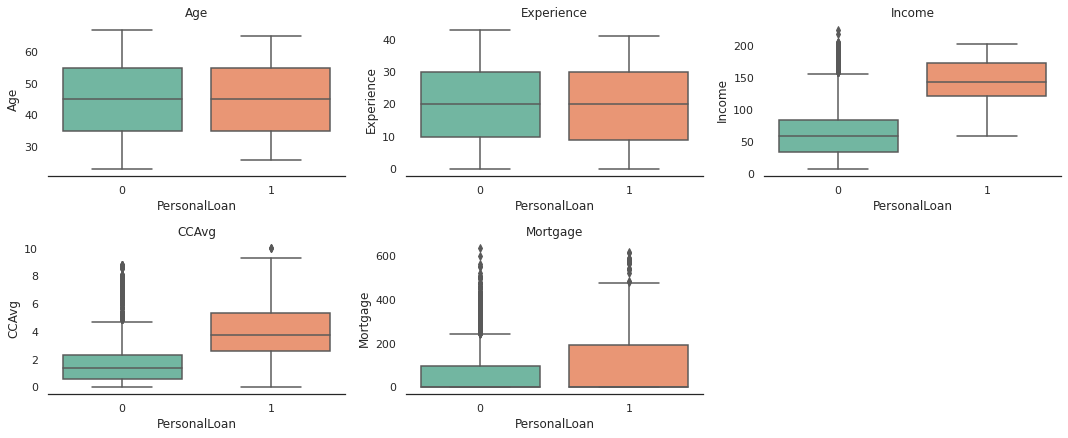

In [26]:

num_cols = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,30))

sns.set_palette(sns.color_palette("Set2", 10))
for i, variable in enumerate(num_cols):
  plt.subplot(10,3,i+1)
  sns.boxplot(x='PersonalLoan',y= customers_data[variable], data=customers_data)
  sns.despine(top=True,right=True,left=True)
  plt.tight_layout()
  plt.title(variable)



Insights-

Age & Experience don't seem to impact our target variable
Target observes Higher Income and Higher Spend
People with loans have slighty wider Mortgage distribution, but overall impact is not significant

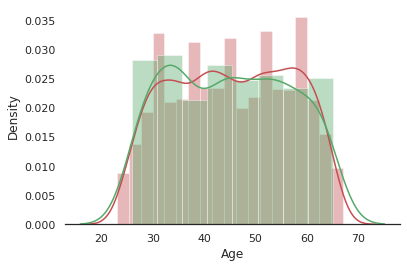

In [27]:


sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Age'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Age'], color = 'g')
sns.despine(top=True,right=True,left=True)


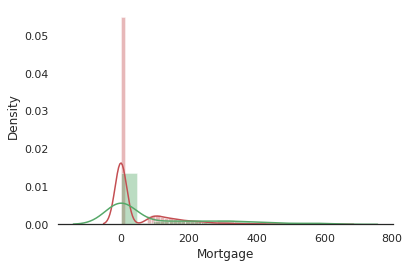

In [28]:

sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Mortgage'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Mortgage'], color = 'g')
sns.despine(top=True,right=True,left=True)

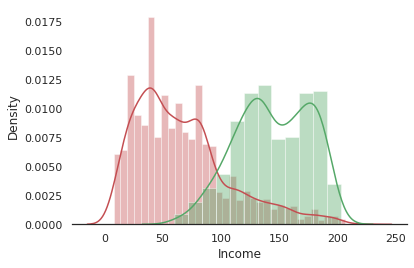

In [29]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Income'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Income'], color = 'g')
sns.despine(top=True,right=True,left=True)


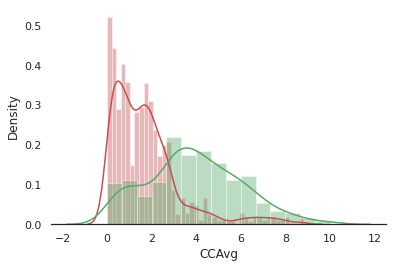

In [30]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['CCAvg'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['CCAvg'], color = 'g')
sns.despine(top=True,right=True,left=True)

Displot Comparison Insights-

Hence our hypotheses seem to be true. The distribution of "1" is left skewed for Income & Average Spend features.

In [31]:

#Bivariate Analysis | Stacked Bars - Categorical Feature(s) vs Target

# Defining function to plot Stacked bar of Categorical Feature vs Target ( 0 & 1)

def stacked_bar_plot(x):
# Displaying data
  sns.set_palette(sns.color_palette("Set2", 10)) # Color theme
  tab1 = pd.crosstab(x,customers_data['PersonalLoan'],margins=True) # Calculate count of 0s and 1s in Target for a feature
  print('************************************************')
  print('Feature : ' + str(variable)) # To display Feature
  print(tab1) # To display crosstab data related to Feature and Target
  print('-'*120) # Seperating line
# Plotting Stack Bar
  tab = pd.crosstab(x,customers_data['PersonalLoan'],normalize='index') # Again calculating crosstab data for plot,
#this time normalising it over rows
  tab.plot(kind='bar',stacked=True,figsize=(7,5))
  plt.xticks(rotation=355)
  labels=["No","Yes"]
  plt.legend(loc='lower left', frameon=False,)
  plt.legend(loc="upper left", labels=labels,title="Borrower ?",bbox_to_anchor=(1,1))
  sns.despine(top=True,right=True,left=True)
  plt.show()


************************************************
Feature : Family
PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


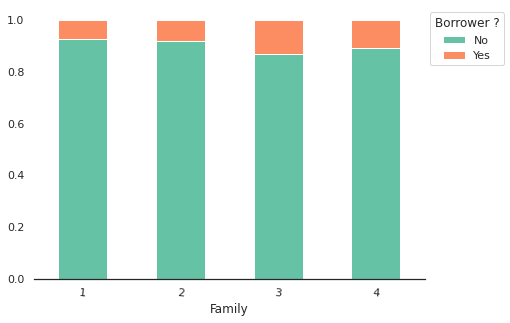

************************************************
Feature : Education
PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


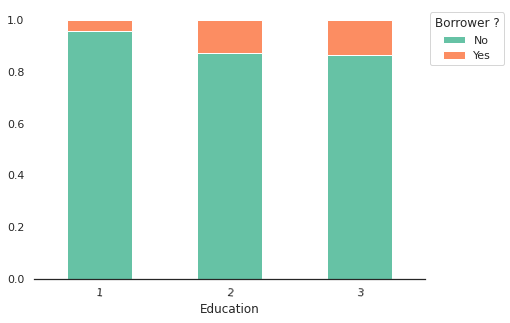

************************************************
Feature : SecuritiesAccount
PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


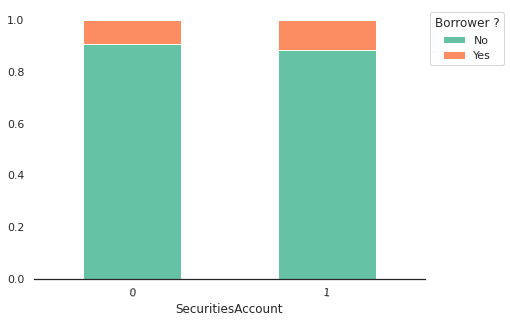

************************************************
Feature : CDAccount
PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


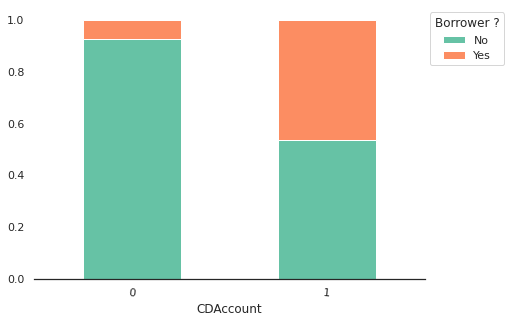

************************************************
Feature : CreditCard
PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


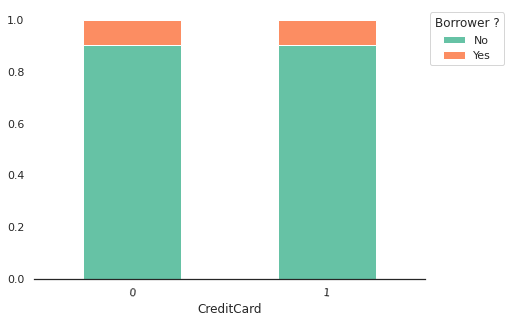

************************************************
Feature : Online
PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


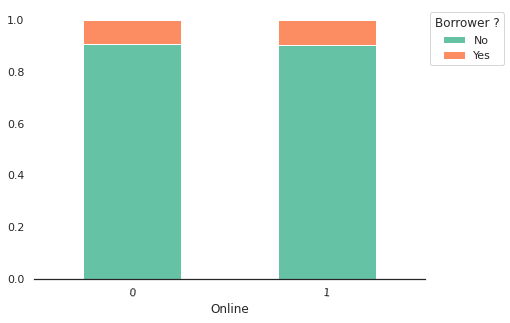

************************************************
Feature : Regions
PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


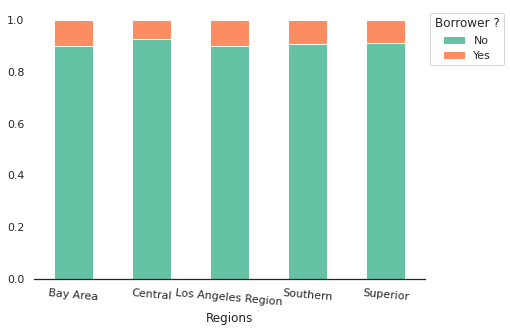

************************************************
Feature : Age_bins
PersonalLoan     0    1   All
Age_bins                     
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
60-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


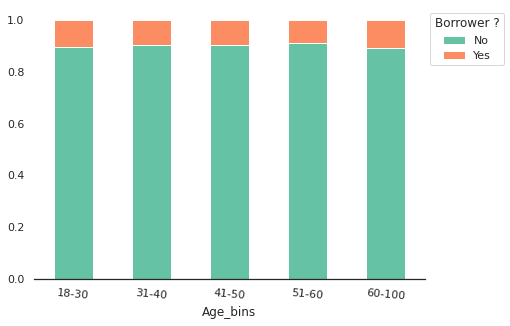

************************************************
Feature : Income_segment
PersonalLoan       0    1   All
Income_segment                 
Lower           1913    0  1913
Middle          2301  223  2524
High             305  257   562
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


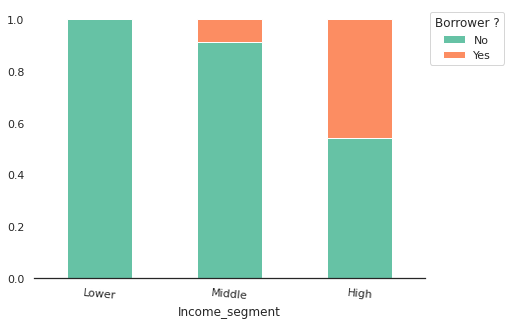

************************************************
Feature : Spending_segment
PersonalLoan         0    1   All
Spending_segment                 
Low               1341   39  1380
Medium            2292   79  2371
High               886  362  1248
All               4519  480  4999
------------------------------------------------------------------------------------------------------------------------


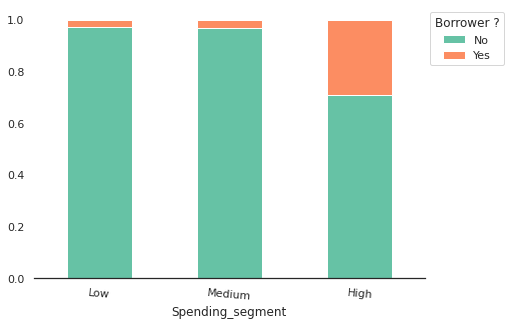

In [32]:
			
# Ploting it by calling the above function for all catgorical features			
cat_cols=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Age_bins',			
'Income_segment','Spending_segment']			
for i, variable in enumerate(cat_cols):			
  stacked_bar_plot(customers_data[variable])			
			

Insights - Stacked Bars

Families of size contitute most towards loan borrowers, as compared to other families.

Customers having a security account with bank have slightly higher chance of borrowing a loan as well.

Customers having a deposit certificate get a loan much more than other customers.

Customers with Online facilities show no corelation with loans.

Customers with other bank Credit card showed no corelation with loans.

LosAngeles and Bay region contribute maximum towards loan borrowers.

Below 30 and Above 60 are 2 most attrative age segments for loan customers.
High spending is directly related with loans.

# **Multivariate Analysis**

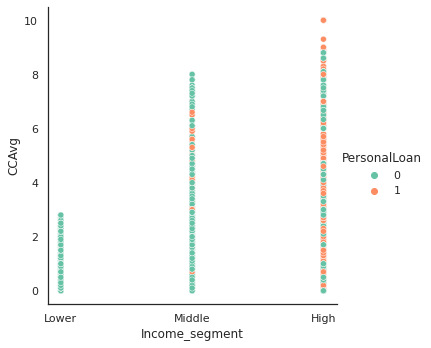

In [33]:

#Multivariate Analysis

#Multivariate Analysis | Income & Average Spend - across Target

sns.relplot(x='Income_segment',y='CCAvg',hue='PersonalLoan',data=customers_data)

#Multivariate Analysis | Income & Mortgage - across Target


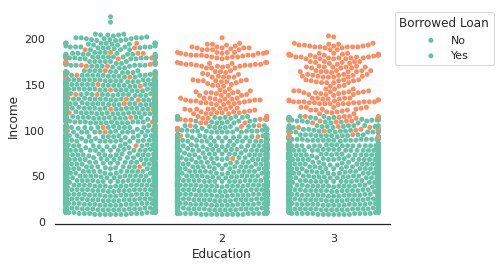

In [34]:

#Multivariate Analysis | Income & Education - across Target

sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=customers_data)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
labels=["No","Yes"]
plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))


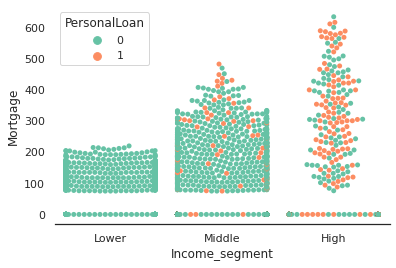

In [35]:
#Multivariate Analysis | Income & Mortgage - across Target
sns.swarmplot(x='Income_segment',y='Mortgage',hue='PersonalLoan',data=customers_data)
sns.despine(top=True,right=True,left=True)

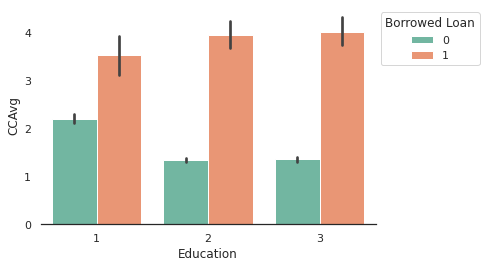

In [36]:
#Multivariate Analysis | Education vs Average Spend - across Targets ( 0 & 1 )

sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=customers_data)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph


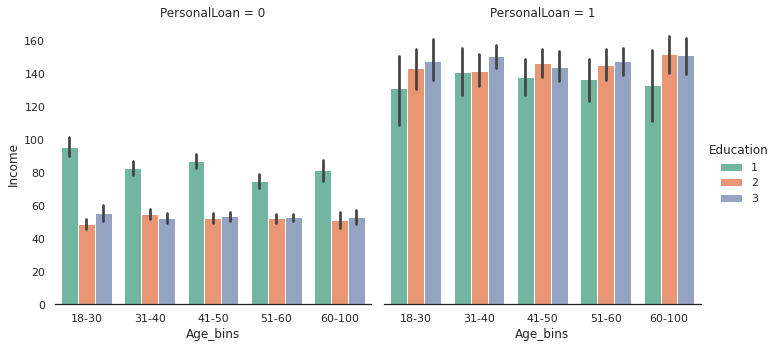

In [37]:
#Multivariate Analysis | Income vs Agebins vs Education - across Targets ( 0 & 1 )

sns.catplot(y='Income',x='Age_bins',hue='Education',kind='bar',col="PersonalLoan", data=customers_data)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

Multivariate Analysis | Insights :

Higher Income is a major factor in determining the loan borrowers.

Higher Mortgages also drive loans to an extent.

Higher Average Spends are also linked to loan borrowers.

Income, Average Spends and Mortgage all seem to be correlated.

Higher Education also drives Usage, Income, Mortages , and thus , loans.

# **Feature Engineering**

## Feature Engineering | Dropping Unnecessary or duplicate features

In [38]:
# Checking the features available in our data before dropping
customers_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Age_bins           4999 non-null   category
 15  Income_segment     4999 non-null   category
 16  Spendi

In [39]:
# As per EDA, dropping columns which are either correlated with some feature or are duplicates
customers_data.drop(columns=["Age_bins", "ZIPCode","County",'Experience','Income_segment','Spending_segment'], inplace=True)

In [40]:
# Dropping target to create Features set an Target set seperately as X & Y
X = customers_data.drop(['PersonalLoan'], axis=1)
Y = customers_data['PersonalLoan']

In [41]:
# Creating dummies out of X
dummie_features=['Regions','Education']
X=pd.get_dummies(X,columns=dummie_features,drop_first=True)

### Feature Engineering | Train Test Split

In [42]:
# Train tst split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [43]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

### Defining funcion for Confusion Matrix

In [44]:
def get_confusion_matrix(y_real,y_predicted,title):
  fig, ax = plt.subplots(1, 1) # Defining figure and axes object
  c_matrix = confusion_matrix(y_real, y_predicted, labels=[0,1]) # getting data for confusin matrix
  display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
  display_labels=["No","Yes"]) # Displaying confusion matrix
  display.plot(cmap='Greens',colorbar=True,ax=ax)
  ax.set_title(title) # title for the chart
  plt.tick_params(axis=u'both', which=u'both',length=0)
  plt.grid(b=None,axis='both',which='both',visible=False)
  plt.show()

### Defining funcion for Metrics calculation and display

In [45]:
def fetch_metrics(classifier,X_train_data,X_test_data,y_train_df,y_test_df,statsklearn,threshold=0.5,flag=True,roc=False):

#This function calculates various metrics for a given model - Accuracy, Precision, Recall and F1 Score
#classifier: This is the model classifier
#X_train_data, X_test_data: Features of test/train sets
#y_train_df,y_test_df: Target variable for train/test sets
#statsklearn : 1 if using an adjusted threshold, otherwise 0
#threshold: Adjusted or most optimized threshold value for classifying as 1
#flag: If True, then print all the metrics , default is True
#roc: If true, display ROC score. Default set to False

  scores_list=[] # Empty list to store train and test performance metrics
  if statsklearn==0:
    pred_train = classifier.predict(X_train_data) # Predict Train data
    pred_test = classifier.predict(X_test_data) # Predict Test data
  else:
    pred_train = (classifier.predict(X_train_data)>threshold) # Predict Train data using specified threshold
    pred_test = (classifier.predict(X_test_data)>threshold) # Predict Train data using specified threshold
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
# Calclating Accuracies
    train_acc = accuracy_score(y_train_df,pred_train) #
    test_acc = accuracy_score(y_test_df,pred_test)
# Calclating Recall
    train_recall = recall_score(y_train_df,pred_train)
    test_recall = recall_score(y_test_df,pred_test)
# Calclating Precision
    train_precision = precision_score(y_train_df,pred_train)
    test_precision = precision_score(y_test_df,pred_test)
# Calclating F1 Score
    train_f1 = f1_score(y_train_df,pred_train)
    test_f1 = f1_score(y_test_df,pred_test)
# Add all the scores to our Scores list
    scores_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
# Display all the Scores if Flag = True
  if flag == True:
    print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
    print("\x1b[0;30;47m \033[1mAccuracy : Train:\x1b[0m",
    round(accuracy_score(y_train_df,pred_train),3),
"\x1b[0;30;47m \033[1mTest:\x1b[0m ",
    round(accuracy_score(y_test_df,pred_test),3))
    print("\x1b[0;30;47m \033[1mRecall : Train:\x1b[0m"
    ,round(recall_score(y_train_df,pred_train),3),
"\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
    round(recall_score(y_test_df,pred_test),3))
    print("\x1b[0;30;47m \033[1mPrecision : Train:\x1b[0m",
    round(precision_score(y_train_df,pred_train),3),
"\x1b[0;30;47m \033[1mTest:\x1b[0m ",
    round(precision_score(y_test_df,pred_test),3))
    print("\x1b[0;30;47m \033[1mF1 : Train:\x1b[0m",
    round(f1_score(y_train_df,pred_train),3),
"\x1b[0;30;47m \033[1mTest:\x1b[0m",
    round(f1_score(y_test_df,pred_test),3))
    get_confusion_matrix(y_train_df,pred_train,"Confusion Matrix for Train")
    get_confusion_matrix(y_test_df,pred_test,"Confusion Matrix for Test")

# Display ROC AUC if roc = True
  if roc == True:
    print("\x1b[0;30;47m \033[1mROC-AUC Score :Train:\x1b[0m: ",
    round(roc_auc_score(y_train_df,pred_train),3),
"\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
    round(roc_auc_score(y_test_df,pred_test),3))
# Return all the scores
  return scores_list

In [46]:
# Initialising empty lists to for train and test results of various models	
	
accuracy_train = []	
accuracy_test = []	
recall_train = []	
recall_test = []	
precision_train = []	
precision_test = []	
f1_score_train = []	
f1_score_test = []	
	
def append_metrics(metric):	
#Adding metric scores to respective lists below so that all models can be compared later'''	
    accuracy_train.append(metric[0])	
    accuracy_test.append(metric[1])	
    recall_train.append(metric[2])	
    recall_test.append(metric[3])	
    precision_train.append(metric[4])	  
    precision_test.append(metric[5])	
    f1_score_train.append(metric[6])	
    f1_score_test.append(metric[7])	

## Model 1 - Logistic Regression with Sklearn library

 MODEL PERFORMANCE
 Accuracy : Train: 0.906  Test:  0.906
 Recall : Train: 0.908  Test: 0.868
 Precision : Train: 0.505  Test:  0.506
 F1 : Train: 0.649  Test: 0.639


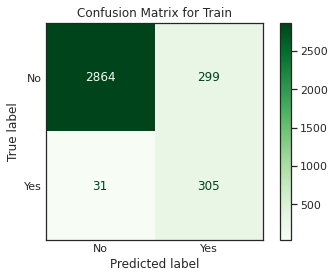

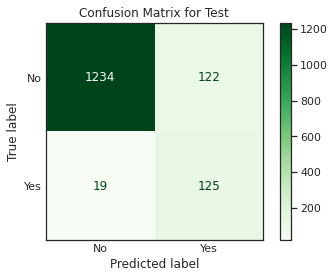

In [47]:
log_reg = LogisticRegression(class_weight='balanced')
model = log_reg.fit(X_train_scaled_df,y_train)

sk_stat=1 # Set 0 for sklearn and 1 for statmodel

# Checking Model performances
scores_Sklearn = fetch_metrics(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,sk_stat)

In [48]:
append_metrics(scores_Sklearn)

### Model 2 - Logistic Regression with Statmodel library

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy : Train: 0.962  Test:  0.953
 Recall : Train: 0.688  Test: 0.653
 Precision : Train: 0.888  Test:  0.817
 F1 : Train: 0.775  Test: 0.726


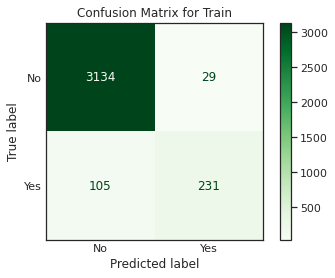

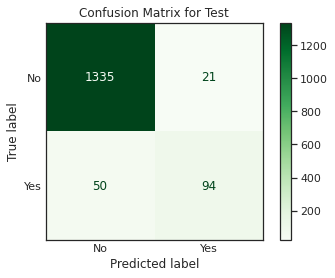

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.6399
Time:                        05:28:24   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [49]:
# Statsmodels by default fits a line passing through origin, it does not take into account the intercept	
# Hence, in order to do that, we can add a constant 1 to our feature set using add_constant function	
	
X_train_statmodel = sm.add_constant(X_train_scaled_df)	
X_test_statmodel = sm.add_constant(X_test_scaled_df)	
	
	
logit = sm.Logit( y_train, X_train_statmodel.astype(float) )	
log_reg = logit.fit(warn_convergence=False)	
	
sk_stat=1  # Set 0 for sklearn and 1 for statmodel	
	
# Training our model and checking performances	
scores_statmodel = fetch_metrics(log_reg,X_train_statmodel,X_test_statmodel,y_train,y_test,sk_stat)	
append_metrics(scores_statmodel)	
log_reg.summary()	


### Model 3 - Logistic Regression with Feature Selection ( P-Value based)

In [50]:
X_train_new = X_train_statmodel.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test_new= X_test_statmodel.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
log_reg = logit.fit(warn_convergence =False)

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.6399
Time:                        05:28:24   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [51]:
X_train_new = X_train_new.drop(['Mortgage'], axis = 1)
X_test_new = X_test_new.drop(['Mortgage'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
log_reg_2 = logit_new.fit()
log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.6366
Time:                        05:28:24   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Model 4 - Logistic Regression with Optimized threshold value

### Dropping age as P value is much greater than 0.05

In [52]:
X_train_new = X_train_new.drop(['Age'], axis = 1)
X_test_new = X_test_new.drop(['Age'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
lr_model3 = logit_new.fit()
lr_model3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.6355
Time:                        05:28:24   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [61]:
%pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 MODEL PERFORMANCE
 Accuracy : Train: 0.959  Test:  0.956
 Recall : Train: 0.682  Test: 0.674
 Precision : Train: 0.864  Test:  0.836
 F1 : Train: 0.762  Test: 0.746


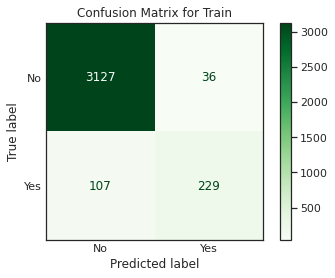

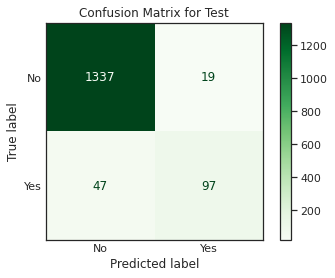

In [67]:
scores_statmodel = fetch_metrics(lr_model3,X_train_new, X_test_new, y_train,y_test,statmodel)
append_metrics(scores_statmodel)

Optimal Threshold valus is --------> 0.09150126568446633
 MODEL PERFORMANCE
 Accuracy : Train: 0.899  Test:  0.897
 Recall : Train: 0.902  Test: 0.875
 Precision : Train: 0.487  Test:  0.481
 F1 : Train: 0.633  Test: 0.621


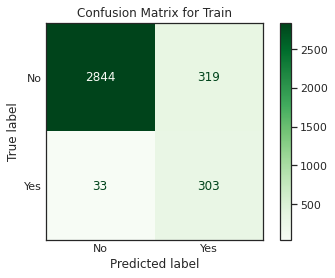

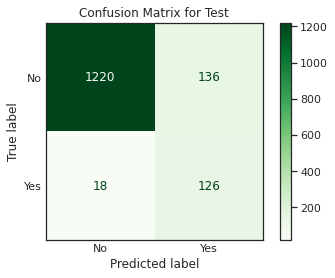

 ROC-AUC Score :Train::  0.9  Test::  0.887


In [63]:
fpr, tpr, thresholds = roc_curve(y_test, lr_model3.predict(X_test_new)) # Getting TPR, FPR and threshold data from ROC curve

optimal_index = np.argmax(tpr - fpr) # Getting indices where tpr-fpr is maximmum
optimal_threshold_auc_roc = thresholds[optimal_index] # This is the optimal threshold value
"Optimal Threshold valus is ----------"
print("Optimal Threshold valus is --------> "+str(optimal_threshold_auc_roc)) # Prining optimal threshold value


statmodel=1
scores_statmodel = fetch_metrics(lr_model3,X_train_new,X_test_new,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
append_metrics(scores_statmodel)


## Further Analysis - ROC Curve & Coefficients Inerpretations

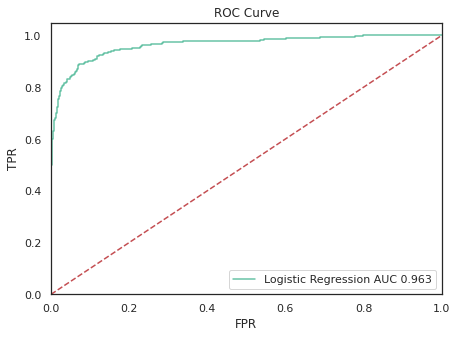

In [64]:
logit_roc_auc_train = roc_auc_score(y_train, lr_model3.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train, lr_model3.predict(X_train_new))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression AUC %0.3f' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

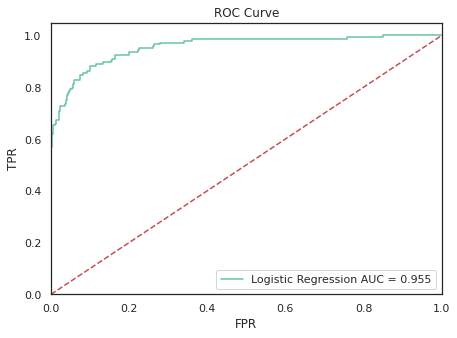

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.6355
Time:                        05:52:18   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [65]:
logit_roc_auc_test = roc_auc_score(y_test, lr_model3.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test, lr_model3.predict(X_test_new))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression AUC = %0.3f' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


lr_model3.summary()

In [66]:

# Below code snippet executes above listed formulas and creates a df to collate Odds ratio, probability
# and p-value of coefficients

log_reg_coeff = pd.DataFrame(lr_model3.params, columns=['coef'])
log_reg_coeff.loc[:, "Odds Ratio"] = np.exp(log_reg_coeff.coef)
log_reg_coeff['Probability'] = log_reg_coeff['Odds Ratio']/(1+log_reg_coeff['Odds Ratio'])
log_reg_coeff['Percentage Change of Odds']=(np.exp(lr_model3.params)-1)*100
log_reg_coeff['pval']=lr_model3.pvalues
pd.options.display.float_format = '{:.2f}'.format
log_reg_coeff = log_reg_coeff.sort_values(by="Odds Ratio", ascending=False)
log_reg_coeff

,coef,Odds Ratio,Probability,Percentage Change of Odds,pval
Income,3.00,20.14,0.95,1913.74,0.00
Education_3,1.95,7.04,0.88,603.79,0.00
Education_2,1.83,6.25,0.86,525.17,0.00
CDAccount,0.84,2.33,0.70,132.66,0.00
Family,0.77,2.16,0.68,115.78,0.00
CCAvg,0.18,1.20,0.54,19.63,0.05
SecuritiesAccount,-0.23,0.79,0.44,-20.85,0.04
Online,-0.34,0.72,0.42,-28.50,0.00
CreditCard,-0.39,0.68,0.40,-31.98,0.00
const,-5.17,0.01,0.01,-99.43,0.00


Interpretations :
Features with +ve coefficients : Income, Education, Family,CCavg,CD account,Age

1 Unit increase in these will increase the probability of a person borrowing loan

Features with -ve coefficients : Securities account,online ,Credit card

1 Unit increase in these will decrease the probability of a person borrowing loan

As discussed in last session, the coefficients of the logistic regression model are in terms of log(odds).

In order to find the odds, we can take exponential of the coefficients. ---> odds = exp(b)

We can also calculate the probability from the odds ratio using this formula --> probability = odds / (1+odds)

% change in odds with 1 unit of change in feauture can be calculated as ----> odds = (exp(b) - 1) * 100

Income: A 1 unit increase will increase the odds of a customer taking a personal loan by 20X ( Given all other features are kept constant)

Family: A 1 unit increase will increase the odds of a customer taking a personal loan by 7X ( Given all other features are kept constant)

CCAvg: A 1 unit increase will increase the odds of a customer taking a personal loan by 1.2X ( Given all other features are kept constant)

Summary & Recommendations
First we did an exhaustive EDA on our data to find important inights, and then developed 4 Logistic Regression models:

Model 1 : Using sklearn

Model 2 : Using statmodel

Model 3 : Improved Feature Selection in Model 2

Model 4 : Improved threshold in Mode 3

The performance of all models was compared mainly on Recall. Model 4 can be treated as best model and can be used to make predictions.

As per EDA & Regression model coefficents , the most important features for a loan borrower are Income,Education, CD account ,Family and CCAvg .

Features with +ve coefficients :Income, Graduate and Advanced Education, Family,CCavg,CD account,Age

Features with +ve coefficients :Securities account,online , credit card
Other important factors as per EDA for most likely borrowers are : Customers with graduate degree, customers having 3 family members